In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, RFECV, mutual_info_classif, mutual_info_regression, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
from sympy import fft 
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, BatchNormalization, Dropout
#from keras import regularizers

import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Data Preprocessing
Introduce the Data¶

Task: Given EEG series, predict wheiter they have Epileptic-Seizure or not

In [2]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
cols = df.columns
outcome = df.y
outcome[outcome>1]=0
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


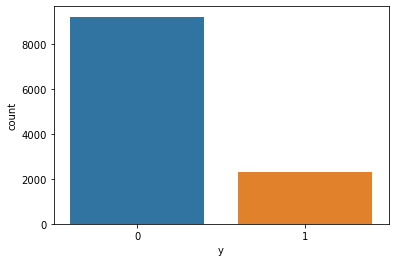

In [4]:
ax = sn.countplot(outcome,label="Count")
non_seizure, seizure = outcome.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [5]:
X = df.iloc[:,1:179].values
X.shape

(11500, 178)

In [6]:
y = df.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Basic data cleaning
A. Dealing with data types

    -Numeric, e.g. income, age
    -Categorical, e.g. gender, nationality
    -Ordinal, e.g. low/medium/high
    
-Models can only handle numeric features

-Must convert categorical and ordinal features into numeric features

    -Create dummy features
    -Transform a categorical feature into a set of dummy features, each representing a unique category
    -In the set of dummy features, 1 indicates that the observation belongs to that category

# 
B. Handling missing data
-Models can not handle missing data

-Simplest solution

    Remove observations/features that have missing data
-But, removing missing data can introduce a lot of issues

    Data is randomly missing: potentially lose a lot of your data
    Data is non-randomly missing: in addition to losing data, you are also introducing potential biases
    Usually, this is a poor solution

-An alternative solution is to use imputation
    
    Replace missing value with another value
    Strategies: mean, median, highest frequency value of given feature

# More Data Exploration

A. Outlier detection

B. Distribution of Features

# Feature Engineering

A. Interactions amongst features¶

B. Dimensionality reduction using PCA

# Feature election and model building


Build model using processed data

Build model using unprocessed data

   ## Splitting the dataset into the Training set and Test set

In [39]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [57]:
#Classificadores
modelos = []
modelos.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelos.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
modelos.append(('K-Nearest Neighbors', KNeighborsClassifier()))
modelos.append(('Classification and Regression Trees', DecisionTreeClassifier()))
modelos.append(('Gaussian Naive Bayes', GaussianNB()))
modelos.append(('Linear Support Vector Machines', svm.LinearSVC()))
modelos.append(('Extra Trees Classifier',ExtraTreesClassifier()))

In [61]:
resultados = []
nomes = []
for nome, modelo in modelos:
	resultado_validacao_cruzada = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
	resultados.append(resultado_validacao_cruzada)
	nomes.append(nome)
	print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.826087 (0.003557)
Linear Discriminant Analysis: 0.823230 (0.004781)
K-Nearest Neighbors: 0.920373 (0.005540)
Classification and Regression Trees: 0.938385 (0.008857)
Gaussian Naive Bayes: 0.958137 (0.007936)
Linear Support Vector Machines: 0.838012 (0.006809)
Extra Trees Classifier: 0.973540 (0.003687)


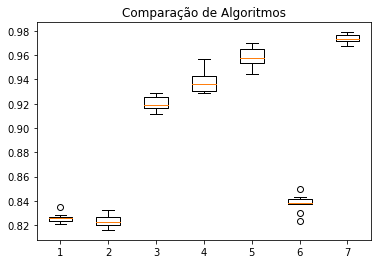

In [68]:
plt.boxplot(resultados)
plt.title('Comparação de Algoritmos')
plt.show()

In [74]:
predicao = []
for nome, modelo in modelos:
    modelo.fit(X_train,y_train)
    predicao.append(modelo.predict(X_test))

In [90]:
for i in range(len(predicao)):
    print(nomes[i])
    print(accuracy_score(y_test,predicao[i]))
    print(confusion_matrix(y_test,predicao[i]))
    print(classification_report(y_test,predicao[i]))

Logistic Regression
0.8269565217391305
[[2738   17]
 [ 580  115]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2755
           1       0.87      0.17      0.28       695

    accuracy                           0.83      3450
   macro avg       0.85      0.58      0.59      3450
weighted avg       0.83      0.83      0.78      3450

Linear Discriminant Analysis
0.827536231884058
[[2747    8]
 [ 587  108]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2755
           1       0.93      0.16      0.27       695

    accuracy                           0.83      3450
   macro avg       0.88      0.58      0.58      3450
weighted avg       0.85      0.83      0.77      3450

K-Nearest Neighbors
0.9156521739130434
[[2748    7]
 [ 284  411]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2755
           1       0.98      0.